### Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

tqdm.pandas()

Читаем данные из фалов  
*Примечание: в данные поле App иявляется индексным*

In [ ]:
movies_keywords = pd.read_csv('/content/drive/My Drive/DataSet/keywords.csv')
movies_credits = pd.read_csv('/content/drive/My Drive/DataSet/credits.csv')
movies_links = pd.read_csv('/content/drive/My Drive/DataSet/links.csv')
movies_links_small = pd.read_csv('/content/drive/My Drive/DataSet/links_small.csv')
movies_movies_metadata = pd.read_csv('/content/drive/My Drive/DataSet/movies_metadata.csv')
movies_ratings = pd.read_csv('/content/drive/My Drive/DataSet/ratings.csv')
movies_ratings_small = pd.read_csv('/content/drive/My Drive/DataSet/ratings_small.csv')
movies_credits.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [ ]:
movies_credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [ ]:
#проверим тип данных
movies_movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
# немного статистики по данным
movies_movies_metadata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
#объединение данных
raw_data = movies_movies_metadata.join(movies_ratings, how='inner')
raw_data.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,110,1.0,1425941529
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1,147,4.5,1425942435
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1,858,5.0,1425941523
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1,1221,5.0,1425941546
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1,1246,5.0,1425941556


In [ ]:
#данные о созданной таблице
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45466 entries, 0 to 45465
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
#выбор нужных столбцов
df = raw_data.drop(['original_title','vote_average','movieId', 'userId', 'timestamp', 'video', 'tagline', 'status', 'spoken_languages', 'release_date', 'production_countries', 'production_companies', 'poster_path', 'overview', 'original_language', 'imdb_id', 'id', 'homepage', 'genres', 'belongs_to_collection', 'adult', 'title', ], axis='columns')
df.head()


,budget,popularity,revenue,runtime,vote_count,rating
0,30000000,21.9469,373554033.0,81.0,5415.0,1.0
1,65000000,17.0155,262797249.0,104.0,2413.0,4.5
2,0,11.7129,0.0,101.0,92.0,5.0
3,16000000,3.85949,81452156.0,127.0,34.0,5.0
4,0,8.38752,76578911.0,106.0,173.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   budget      45466 non-null  object 
 1   popularity  45461 non-null  object 
 2   revenue     45460 non-null  float64
 3   runtime     45203 non-null  float64
 4   vote_count  45460 non-null  float64
 5   rating      45466 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.4+ MB


In [ ]:
#поменяем тип Popularity и Budget с object на float64
df.budget = pd.to_numeric(df.budget, errors='coerce')
df.popularity = pd.to_numeric(df.popularity, errors='coerce')
df.head()

,budget,popularity,revenue,runtime,vote_count,rating
0,30000000.0,21.946943,373554033.0,81.0,5415.0,1.0
1,65000000.0,17.015539,262797249.0,104.0,2413.0,4.5
2,0.0,11.712900,0.0,101.0,92.0,5.0
3,16000000.0,3.859495,81452156.0,127.0,34.0,5.0
4,0.0,8.387519,76578911.0,106.0,173.0,5.0


In [ ]:
# НОРМАЛИЗАЦИЯ ДАННЫХ
import sklearn.preprocessing as preprocessing
mm_scalar = preprocessing.RobustScaler()
mm_scalar.fit(df)
mm_norm_number_data = pd.DataFrame(columns=df.columns, data=mm_scalar.transform(df))
mm_norm_number_data.head()

,budget,popularity,revenue,runtime,vote_count,rating
0,30000000.0,6.322364,373554033.0,-0.636364,174.354839,-2.5
1,65000000.0,4.824802,262797249.0,0.409091,77.516129,1.0
2,0.0,3.214504,0.0,0.272727,2.645161,1.5
3,16000000.0,0.829592,81452156.0,1.454545,0.774194,1.5
4,0.0,2.204657,76578911.0,0.500000,5.258065,1.5


In [ ]:
#функция 
def okk(x):
  if x['revenue'] >= x['budget']:
    return 1
  else:
    return 0

#функция по определению ОКУПАЕМОСТИ/НЕ ОКУПАЕМОСТИ
mm_norm_number_data['payback'] = mm_norm_number_data.apply(okk, axis=1)
#УДАЛЯЕМ НЕНУЖНЫЙ ПРИЗНАК / СТОЛБЕЦ
# mm_norm_number_data.pop(mm_norm_number_data.columns[2])

mm_norm_number_data.head(15)

,budget,popularity,revenue,runtime,vote_count,rating,payback
0,30000000.0,6.322364,373554033.0,-0.636364,174.354839,-2.5,1
1,65000000.0,4.824802,262797249.0,0.409091,77.516129,1.0,1
2,0.0,3.214504,0.0,0.272727,2.645161,1.5,1
3,16000000.0,0.829592,81452156.0,1.454545,0.774194,1.5,1
4,0.0,2.204657,76578911.0,0.500000,5.258065,1.5,1
5,60000000.0,5.100964,187436818.0,3.409091,60.516129,0.5,1
6,58000000.0,1.685293,0.0,1.454545,4.225806,1.0,0
7,0.0,0.435316,0.0,0.090909,1.129032,1.5,1
8,35000000.0,1.246265,64350171.0,0.500000,5.290323,0.5,1
9,58000000.0,4.117382,352194034.0,1.590909,38.193548,0.5,1


In [ ]:
pd.isnull(mm_norm_number_data).sum()

budget          3
popularity      6
revenue         6
runtime       263
vote_count      6
rating          0
payback         0
dtype: int64

In [ ]:
# Удаление пропусков через взятия среднего
# ИТОГОВЫЕ ДАННЫЕ - ready_df
ready_df = mm_norm_number_data.fillna(mm_norm_number_data.mean())
print(f'Mean: \n{mm_norm_number_data.mean()}')
print("--------------------------------------------")
pd.isnull(ready_df).sum()

Mean: 
budget        4.224579e+06
popularity    5.447368e-01
revenue       1.120935e+07
runtime      -3.962730e-02
vote_count    3.222495e+00
rating       -6.147451e-03
payback       8.873884e-01
dtype: float64
--------------------------------------------


budget        0
popularity    0
revenue       0
runtime       0
vote_count    0
rating        0
payback       0
dtype: int64

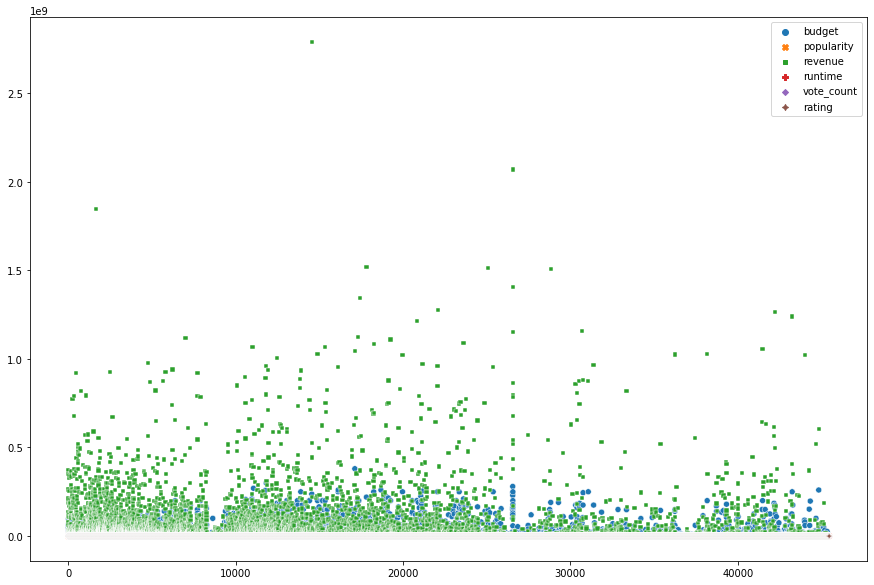

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=ready_df[ready_df.columns[:-1]])

In [ ]:
from sklearn.model_selection import train_test_split

X = ready_df[ready_df.columns[:-1]]
Y = ready_df[ready_df.columns[-1:]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.4)

In [ ]:
#подключаем библиотеку
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

In [ ]:
#создем сеть
model = Sequential()

In [ ]:
#создаем сущность сети
model.add(Dense(5, activation='relu', input_dim=X_train.shape[1]))

In [ ]:
#добавляем слой из 10 нейронов с функцией активации Relu и количеством входов
#равным количеству столбцов во входном массиве
model.add(Dense(Y_train.shape[1], activation=activations.softmax))

In [ ]:
#добавляем последний слой
model.compile(Adam(), categorical_crossentropy, metrics='acc')

In [ ]:
#обучение ()
model.fit(X_train, Y_train, verbose=2, epochs=10, batch_size=3)

Epoch 1/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 2/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 3/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 4/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 5/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 6/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 7/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 8/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 9/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898
Epoch 10/10
6062/6062 - 4s - loss: 0.0000e+00 - acc: 0.8898


In [ ]:
#для тренировочных данных
model.evaluate(X_train, Y_train)

569/569 [==============================] - 1s 917us/step - loss: 0.0000e+00 - acc: 0.8898


[0.0, 0.8898053169250488]

In [ ]:
#для тестовых данных
model.evaluate(X_test, Y_test)

853/853 [==============================] - 1s 965us/step - loss: 0.0000e+00 - acc: 0.8858


[0.0, 0.8857771158218384]

In [ ]:
X_train.shape, X_test.shape

((18186, 6), (27280, 6))